In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', '..', 'pplSIT', 'workflow', 'utils'))

In [6]:
%matplotlib inline

import pandas as pd
from sessions import selected_009266, selected_008229, selected_009265, selected_57
from imports import *
from scipy import stats
from scipy import signal
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols, glm

from Behavior.behavior import get_extent, get_idxs_behav_state
from population import unit_response_matrix, activity_at_phase
from spatial import get_positions_relative_to
from setup import get_speaker_positions

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
def get_GLM_and_prediction(syl_ratio_mx, pop_at_phase, test_size=0.33, glm_min_pval=0.95):

    # separate train / test
    X_train, X_test, y_train, y_test = train_test_split(syl_ratio_mx, pop_at_phase, test_size=test_size)
    
    # train glm to get contributions of each syllable
    data = np.column_stack([y_train, X_train])
    columns = ['state'] + ["x%d" % x for x in range(X_train.shape[1])]
    AM_df = pd.DataFrame(data, columns=columns)

    model = glm('state ~ ' + ' + '.join(columns[1:]), data=AM_df).fit()
    #model.summary()
    
    glm_coeffs = dict([(i, coef) for i, coef in enumerate(model.params[1:]) if model.pvalues[1:][i] < glm_min_pval])
    #if len(glm_coeffs) == 0:
    #    return 0, 0, model.params, model.pvalues
    target_fit = np.zeros(len(y_test))
    for idx, coef in glm_coeffs.items():
        target_fit += coef * X_test[:, idx]

    corr, pval = stats.spearmanr(target_fit, y_test)
    #corr, pval = stats.pearsonr(target_fit, y_test)
    #corr, pval = stats.spearmanr(stats.rankdata(target_fit), stats.rankdata(y_test))
    if np.isnan(corr):
        corr, pval = 0., 1.
    
    return corr, pval, model.params, model.pvalues

In [17]:
source = '/home/sobolev/nevermind_ag-grothe/AG_Pecka/data/processed/'
source = '/home/sobolev/nevermind/AG_Pecka/data/processed/'
rep_path = '/home/sobolev/nevermind/Andrey/analysis/manuscripts/'

# manuscript session
# '009266_hippoSIT_2023-04-18_10-10-37'

all_selected = selected_009266 + selected_009265 + selected_57
#selected = all_selected[:]
selected = all_selected
#selected = selected_009266
selected

['009266_hippoSIT_2023-04-17_17-04-17',
 '009266_hippoSIT_2023-04-18_10-10-37',
 '009266_hippoSIT_2023-04-18_17-03-10',
 '009266_hippoSIT_2023-04-19_10-33-51',
 '009266_hippoSIT_2023-04-20_08-57-39',
 '009266_hippoSIT_2023-04-21_08-43-00',
 '009266_hippoSIT_2023-04-21_13-12-31',
 '009266_hippoSIT_2023-04-24_10-08-11',
 '009266_hippoSIT_2023-04-24_16-56-55',
 '009266_hippoSIT_2023-04-26_08-20-17',
 '009266_hippoSIT_2023-05-02_12-22-14',
 '009266_hippoSIT_2023-05-04_19-47-15',
 '009266_hippoSIT_2023-05-22_09-27-22',
 '009266_hippoSIT_2023-05-23_09-18-05',
 '009266_hippoSIT_2023-05-25_15-55-57',
 '009266_hippoSIT_2023-06-14_08-21-23',
 '009266_hippoSIT_2023-06-19_08-58-35',
 '009265_hippoSIT_2023-02-28_13-16-10',
 '009265_hippoSIT_2023-02-28_20-45-04',
 '009265_hippoSIT_2023-03-01_10-46-12',
 '009265_hippoSIT_2023-03-02_09-32-54',
 '009265_hippoSIT_2023-03-02_16-27-42',
 '009265_hippoSIT_2023-03-02_20-11-35',
 '009265_hippoSIT_2023-03-03_09-37-07',
 '009265_hippoSIT_2023-03-03_16-00-47',


### Check speaker position

In [18]:
for session in selected:
    print(get_speaker_positions(source, session))

{'BGR': (0.0, 0.5), 'TGT': (-0.37, -0.37)}
{'BGR': (0.0, 0.5), 'TGT': (-0.37, -0.37)}
{'BGR': (0.0, 0.5), 'TGT': (-0.37, -0.37)}
{'BGR': (0.0, 0.5), 'TGT': (-0.37, -0.37)}
{'BGR': (0.0, 0.5), 'TGT': (-0.37, -0.37)}
{'BGR': (0.0, 0.5), 'TGT': (0.0, 0.5)}
{'BGR': (0.0, 0.5), 'TGT': (0.0, 0.5)}
{'BGR': (0.0, 0.5), 'TGT': (0.0, 0.5)}
{'BGR': (0.0, 0.5), 'TGT': (0.0, 0.5)}
{'BGR': (0.0, 0.5), 'TGT': (0.0, 0.5)}
{'BGR': (0.0, 0.5), 'TGT': (0.0, 0.5)}
{'BGR': (0.0, 0.5), 'TGT': (0.0, 0.5)}
{'BGR': (0.0, 0.5), 'TGT': (0.0, 0.5)}
{'BGR': (0.0, 0.5), 'TGT': (0.0, 0.5)}
{'BGR': (0.0, 0.5), 'TGT': (0.0, 0.5)}
{'BGR': (0.0, 0.5), 'TGT': (0.0, 0.5)}
{'BGR': (0.0, 0.5), 'TGT': (-0.37, -0.37)}
{'BGR': (0.0, 0.5), 'TGT': (-0.37, -0.37)}
{'BGR': (0.0, 0.5), 'TGT': (-0.37, -0.37)}
{'BGR': (0.0, 0.5), 'TGT': (-0.37, -0.37)}
{'BGR': (0.0, 0.5), 'TGT': (-0.37, -0.37)}
{'BGR': (0.0, 0.5), 'TGT': (-0.37, -0.37)}
{'BGR': (0.0, 0.5), 'TGT': (-0.37, -0.37)}
{'BGR': (0.0, 0.5), 'TGT': (-0.37, -0.37)}
{'BGR': (0.0

In [19]:
iter_count = 100
glm_stats = {}
speed_thresh = 0.04
ft = 'tSNE'
fp = 70

for session in selected[:]:
    animal = session.split('_')[0]
    session_path     = os.path.join(source, animal, session)
    meta_file        = os.path.join(session_path, 'meta.h5')
    desc_file        = os.path.join(session_path, 'descendants.h5')
    moseq_file       = os.path.join(session_path, 'MoSeq.h5')
    moseq_class_file = os.path.join(session_path, 'analysis', 'MoSeq_tSNE_UMAP.h5')
    segm_file  = os.path.join(session_path, 'analysis', 'bMAP_segmentation.h5')
    nmap_file  = os.path.join(session_path, 'analysis', 'nMAP_EV_SU.h5')
    
    with h5py.File(nmap_file, 'r') as f:
        w_mx = np.array(f['response_manifold'])
    with h5py.File(meta_file, 'r') as f:
        tl = np.array(f['processed']['timeline'])
        tgt_mx = np.array(f['processed']['target_matrix'])
        events = np.array(f['processed']['sound_events'])
    #with h5py.File(moseq_class_file, 'r') as f:
    #    idxs_srm_tl = np.array(f['idxs_srm_tl'])
    #    fit = np.array(f[ft][str(fp)])
    with h5py.File(moseq_file, 'r') as f:
        moseq = np.array(f['moseq'])
    with h5py.File(desc_file, 'r') as f:
        speed = np.array(f['speed'])
        hd    = np.array(f['hd'])
    with h5py.File(moseq_file, 'r') as f:
        msq = np.array(f['moseq'])
        pos_xy = msq[:, 3:5]

    with h5py.File(segm_file, 'r') as f:
        idxs_tgt_succ_state_ev = np.array(f['idxs_tgt_succ_state_ev']).astype(np.int32)
        
    # auditory state (BGR, SIL etc.) and speed filter
    idxs_sta_ev = np.where(speed[events[:, 2].astype(np.int32)] < speed_thresh)[0]  # define speed filter here
    idxs_bgr_ev = np.where(events[:, 1] == 1)[0]
    idxs_sil_ev = np.where(events[:, 1] == 0)[0]
    idxs_tgt_ev = np.where(events[:, 1] == 2)[0]
    idxs_noi_ev = np.where(events[:, 1] == -1)[0]
    idxs_tl_ev  = events[:, 2].astype(np.int32)
    
    # event filter
    #idxs_filt = np.where(events[:, 1] == 0)[0]
    idxs_filt = np.where( (events[:, 1] == 0) | (events[:, 1] == 1) )[0]  # BGR + SIL
    #idxs_filt = np.arange(len(events))  # everything

    # 1. ---- Speed
    speed_ev = speed[events[:, 2].astype(np.int32)]
    speed_flt_ev = speed_ev[idxs_filt]

    # 2. ---- Population activity 
#     bins, unit_mx = unit_response_matrix(session_path, [1, 2], times_to_event=[])

#     # z-score
#     unit_act_matrix = unit_mx.T
#     for u, unit_data in enumerate(unit_act_matrix):
#         unit_act_matrix[u] = stats.zscore(unit_data)
#     unit_mx = unit_act_matrix.T

#     # take first PC from PCA on multiple units
#     pca = decomposition.PCA(n_components=3)
#     pca.fit(unit_mx)
#     X = pca.transform(unit_mx)
#     pop_act = X[:, 0]  # PC1 score

#     # filter events
#     pop_act = pop_act[idxs_filt]

#     # smooth
#     k_width = 24  # 6 sec
#     kernel  = signal.gaussian(k_width, std=(k_width) / 7.2)
#     pop_act = np.convolve(pop_act, kernel, 'same') / kernel.sum()

#     # filter slow oscillations
#     sos = signal.butter(10, 0.001, fs=4, analog=False, btype='highpass', output='sos')
#     pop_act = signal.sosfiltfilt(sos, pop_act)


    # 3. ---- Behavioral state
    bAL = np.zeros(len(events))
    #bAL[idxs_AL_ev] = 1
    bAL[idxs_tgt_succ_state_ev] = 1
    bAL = bAL[idxs_filt]
    
    # 4. try nAL state (only OR with bAL)
#     nAL_idxs = np.union1d(idxs_neuro_AL_bgr_ev, idxs_neuro_AL_sil_ev)
#     nAL = np.zeros(len(events))
#     nAL[nAL_idxs] = 1
#     nAL = nAL[idxs_filt]
    
    # 5. try speeds of all 13 parts from MoSeq (if they can improve)
#     bp_count = 13
#     bpc_speeds = np.zeros([len(moseq), bp_count])
#     width = 75  # 100 points ~= 1 sec with at 100Hz
#     kernel = signal.gaussian(width, std=(width) / 7.2)
#     for j in np.arange(bp_count):
#         dx = np.sqrt(np.square(np.diff(moseq[:, 2*j+6])) + np.square(np.diff(moseq[:, 2*j+2])))
#         dt = np.diff(moseq[:, 0])
#         bpc = np.concatenate([dx/dt, [dx[-1]/dt[-1]]])
#         bpc_speeds[:, j] = np.convolve(bpc, kernel, 'same') / kernel.sum()
#     bpc_speeds_ev = bpc_speeds[events[:, 2].astype(np.int32)][idxs_filt]
    
    # 6. add smth random to show no influence
    rnd = np.random.rand(len(bAL))

    # 7. Angle and distance to the speaker
    ang_to_speaker = np.zeros(len(events))
    dst_to_speaker = np.zeros(len(events))
    
    speaker_positions = get_speaker_positions(source, session)
    pos_ego_bgr = get_positions_relative_to(pos_xy[idxs_tl_ev], hd[idxs_tl_ev], speaker_positions['BGR'])
    pos_ego_tgt = get_positions_relative_to(pos_xy[idxs_tl_ev], hd[idxs_tl_ev], speaker_positions['TGT'])
    
    ang_to_speaker = pos_ego_tgt[:, 1].copy()  # default relative to target (also in silence)
    ang_to_speaker[idxs_bgr_ev] = pos_ego_bgr[idxs_bgr_ev][:, 1]
    
    dst_to_speaker = pos_ego_tgt[:, 0]  # default relative to target (also in silence)
    dst_to_speaker[idxs_bgr_ev] = pos_ego_bgr[idxs_bgr_ev][:, 0]
        
    # don't forget the event filter
    ang_to_speaker = ang_to_speaker[idxs_filt]
    dst_to_speaker = dst_to_speaker[idxs_filt]
        
    # 8. Radial position in the arena
    radial_pos = np.sqrt(pos_xy[:, 0]**2 + pos_xy[:, 1]**2)[idxs_tl_ev]
    radial_pos = radial_pos[idxs_filt]
    
    
    # 4. Compute GLM and prediction
    glm_stats[session] = {}
    for j in range(2):  # W1-W4 phases
        #wx = activity_at_phase(session_path, phase=j+1, do_pca=True, k_width=30)
        wx = w_mx[:, j]
        wx = wx[idxs_filt]
        data = np.column_stack([speed_flt_ev, bAL, ang_to_speaker, dst_to_speaker, radial_pos, rnd])
    
        # compute original
        corr, pval, params, pvalues = get_GLM_and_prediction(data, wx)
        #corr, pval, params, pvalues = get_GLM_and_prediction(np.column_stack([bpc_speeds_ev, bAL]), w4)
        glm_stats[session]['W%d' % j] = [corr, pval] + list(params[1:])

        # compute shuffled
        corr_mx_shuf = np.zeros([iter_count, 2])  # coeff, pval for each shuffle
        for i in range(iter_count):
            wx_s = wx.copy()
            np.random.shuffle(wx_s)
            corr_s, pval_s, _, _ = get_GLM_and_prediction(data, wx_s)
            corr_mx_shuf[i] = (corr_s, pval_s)
            del wx_s
        glm_stats[session]['W%d_shuf' % j] = corr_mx_shuf
    
    # output
    params_to_print = "; ".join(["%.2f" % p for p in params[1:]])
    pvals_to_print  = "; ".join(["%.2f" % p for p in pvalues[1:]])
    print("%s - Pred: %.2f, pval: %.3f; Coeffs: %s" % (session[-19:-6], corr, pval, params_to_print))
    #print("%s - Pred: %.2f, pval: %.3f" % (session[-19:-6], corr, pval))
    #print("Coeffs: %s" % params_to_print)
    #print("PVals:  %s" % pvals_to_print)

2023-04-17_17 - Pred: 0.21, pval: 0.000; Coeffs: 0.64; -0.26; -0.01; 0.00; 0.02; 0.02
2023-04-18_10 - Pred: 0.45, pval: 0.000; Coeffs: 1.52; -0.46; 0.01; 0.04; 0.86; 0.01
2023-04-18_17 - Pred: 0.33, pval: 0.000; Coeffs: 1.29; -0.19; 0.00; -0.06; 0.19; 0.01
2023-04-19_10 - Pred: 0.32, pval: 0.000; Coeffs: 1.24; -0.23; 0.02; -0.04; -0.25; 0.01
2023-04-20_08 - Pred: 0.58, pval: 0.000; Coeffs: 1.06; -0.31; 0.02; -0.03; 0.61; 0.01
2023-04-21_08 - Pred: 0.34, pval: 0.000; Coeffs: 0.68; -0.12; -0.01; -0.25; 1.11; -0.03
2023-04-21_13 - Pred: 0.27, pval: 0.000; Coeffs: 0.58; -0.11; 0.00; 0.03; 0.43; 0.00
2023-04-24_10 - Pred: 0.37, pval: 0.000; Coeffs: 0.99; -0.41; -0.00; 0.14; 0.46; 0.08
2023-04-24_16 - Pred: 0.26, pval: 0.000; Coeffs: 0.84; -0.11; 0.01; 0.22; 0.56; -0.01
2023-04-26_08 - Pred: 0.63, pval: 0.000; Coeffs: 1.90; -0.46; -0.02; -0.27; 2.32; -0.03
2023-05-02_12 - Pred: 0.34, pval: 0.000; Coeffs: 0.72; -0.30; -0.02; -0.20; 0.60; -0.01
2023-05-04_19 - Pred: 0.50, pval: 0.000; Coeffs: 

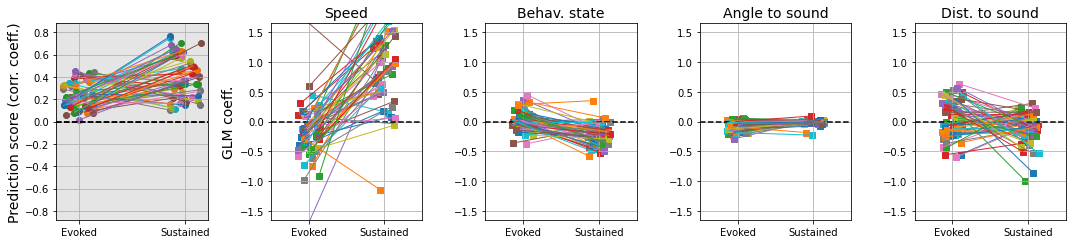

In [25]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3.5))

titles = ['Predicted pop. act.', 'Speed', 'Behav. state', 'Angle to sound', 'Dist. to sound', 'Radial pos.']
perc_shuf = np.zeros([len(glm_stats.keys()), 2])

# main plot with prediction scores
ax = axes[0]
max_score = 0.8
ax.set_ylim(-1.1*max_score, 1.1*max_score)
ax.axhspan(-1.1*max_score, 1.1*max_score, alpha=0.1, color='black')
ax.grid()
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['Evoked', 'Sustained'])
ax.axhline(perc_shuf[:, 0].min(), ls='--', color='black', label='shuffle')
ax.axhline(perc_shuf[:, 1].max(), ls='--', color='black')
#ax.set_title('Speed + bAL => A1 pop. act', fontsize=14)
ax.set_ylabel('Prediction score (corr. coeff.)', fontsize=14)
for i, (session, data) in enumerate(glm_stats.items()):
    scores = []
    perc_curr = np.zeros([2, 2])
    for j in range(2):
        scores.append(data['W%d' % j][0])
        coeffs_shuf = data["W%d_shuf" % j][:, 0]
        perc_curr[j] = np.array([np.percentile(coeffs_shuf, 5), np.percentile(coeffs_shuf, 95)])
    offset = (np.random.rand(1)[0] - 0.5)*0.3
    ax.scatter(np.arange(2) + offset, scores)
    ax.plot(np.arange(2) + offset, scores, lw=1)
    perc_shuf[i] = perc_curr.max(axis=0)
    #break
    
max_score = 0
markers = [",", ",", ",", ",", ",", ","]
for k in range(4):
    ax = axes[k+1]
    ax.grid()
    ax.set_xticks(np.arange(2))
    ax.set_xticklabels(['Evoked', 'Sustained'])
    ax.axhline(0, ls='--', color='black')
    ax.set_xlim(-0.5, 1.5)
    #ax.axhline(perc_shuf[:, 1].max(), ls='--', color='black')
    ax.set_title(titles[k+1], fontsize=14)
    if k == 0:
        ax.set_ylabel('GLM coeff.', fontsize=14)
    for i, (session, data) in enumerate(glm_stats.items()):
        scores = []
        for j in range(2):
            scores.append(data['W%d' % j][k+2])
        offset = (np.random.rand(1)[0] - 0.5)*0.3
        ax.scatter(np.arange(2) + offset, scores, marker=markers[k])
        ax.plot(np.arange(2) + offset, scores, lw=1)
        if np.abs(np.array(scores)).max() > max_score:
            max_score = np.abs(np.array(scores)).max()

max_score = 1.5
for ax in axes[1:]:
    ax.set_ylim(-1.1*max_score, 1.1*max_score)
# axes[1].set_ylim(-1.1*max_score, 1.1*max_score)
# max_score = 1.8
# axes[2].set_ylim(-1.1*max_score, 1.1*max_score)

fig.tight_layout()

In [26]:
fig.savefig(os.path.join(rep_path, 'GLM_cross_session.png'), dpi=300)
#fig.savefig(os.path.join(report, 'population', 'GLM_speed_bAL_W1_W4_%s.pdf' % animal))
#fig.savefig(os.path.join(report, 'population', 'GLM_speed_bE_to_E1-3S1_%s_SEGM.png' % animal), dpi=300)

## S1 reconstruction

## Sklearn OLS / other GLMs

In [26]:
from sklearn.linear_model import PoissonRegressor, GammaRegressor, LinearRegression


2023-04-17

2023-04-18

2023-04-18

2023-04-19

2023-04-20

2023-04-21

2023-04-21

2023-04-24

2023-04-24

2023-04-26

2023-05-02

2023-05-04

2023-05-22

2023-05-23

2023-05-25

2023-06-14

2023-06-19


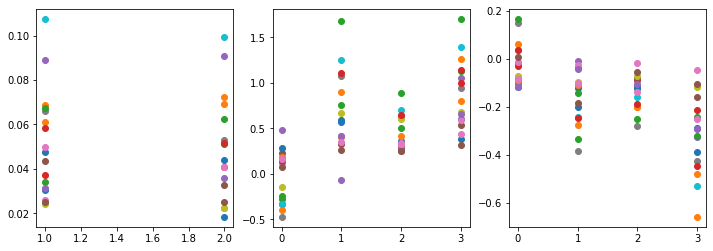

In [39]:
iter_count = 100
glm_stats = {}

rows = 1
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 4))

for i, session in enumerate(selected):
    ft = 'tSNE'
    fp = 70
    animal = session.split('_')[0]
    session_path     = os.path.join(source, animal, session)
    meta_file        = os.path.join(source, animal, session, 'meta.h5')
    desc_file        = os.path.join(source, animal, session, 'descendants.h5')
    moseq_file       = os.path.join(source, animal, session, 'MoSeq.h5')
    moseq_class_file = os.path.join(source, animal, session, 'analysis', 'MoSeq_tSNE_UMAP.h5')
    state_file = os.path.join(source, animal, session, 'analysis', 'state_idxs.h5')

    with h5py.File(meta_file, 'r') as f:
        tl = np.array(f['processed']['timeline'])
        tgt_mx = np.array(f['processed']['target_matrix'])
        events = np.array(f['processed']['sound_events'])
    with h5py.File(moseq_class_file, 'r') as f:
        idxs_srm_tl = np.array(f['idxs_srm_tl'])
        fit = np.array(f[ft][str(fp)])
    with h5py.File(moseq_file, 'r') as f:
        moseq = np.array(f['moseq'])
    with h5py.File(desc_file, 'r') as f:
        speed = np.array(f['speed'])
        hd    = np.array(f['hd'])
    with h5py.File(state_file, 'r') as f:
        idxs_AL_ev = np.array(f['idxs_AL_ev'])  # bAL state
        idxs_neuro_AL_bgr_ev = np.array(f['idxs_neuro_AL_bgr_ev'])
        idxs_neuro_AL_sil_ev = np.array(f['idxs_neuro_AL_sil_ev'])
        idxs_neuro_PH_bgr_ev = np.array(f['idxs_neuro_PH_bgr_ev'])
        idxs_neuro_PH_sil_ev = np.array(f['idxs_neuro_PH_sil_ev'])
        
    # event filter
    idxs_filt = np.where( (events[:, 1] == 1) | (events[:, 1] == 0) )[0]  # BGR + SIL
    #idxs_filt = np.where( events[:, 1] == 2)[0] 
    
    # 1. ---- Speed
    speed_ev = speed[events[:, 2].astype(np.int32)]
    speed_flt_ev = speed_ev[idxs_filt]

    # 2. ---- Population activity 
    bins, unit_mx = unit_response_matrix(session_path, [1, 2], times_to_event=[])

    # z-score
    unit_act_matrix = unit_mx.T
    for u, unit_data in enumerate(unit_act_matrix):
        unit_act_matrix[u] = stats.zscore(unit_data)
    unit_mx = unit_act_matrix.T

    # take first PC from PCA on multiple units
    pca = decomposition.PCA(n_components=3)
    pca.fit(unit_mx)
    X = pca.transform(unit_mx)
    pop_act = X[:, 0]  # PC1 score

    # filter events
    pop_act = pop_act[idxs_filt]

    # smooth
    k_width = 24  # 6 sec
    kernel  = signal.gaussian(k_width, std=(k_width) / 7.2)
    pop_act = np.convolve(pop_act, kernel, 'same') / kernel.sum()

    # filter slow oscillations
    sos = signal.butter(10, 0.001, fs=4, analog=False, btype='highpass', output='sos')
    pop_act = signal.sosfiltfilt(sos, pop_act)

    # 3. ---- Behavioral state
    bAL = np.zeros(len(events))
    bAL[idxs_AL_ev] = 1
    bAL = bAL[idxs_filt]
    
    # 4. try nAL state (only OR with bAL)
    nAL_idxs = np.union1d(idxs_neuro_AL_bgr_ev, idxs_neuro_AL_sil_ev)
    nAL = np.zeros(len(events))
    nAL[nAL_idxs] = 1
    nAL = nAL[idxs_filt]
    
    # 5. try speeds of all 13 parts from MoSeq (if they can improve)
    bp_count = 13
    bpc_speeds = np.zeros([len(moseq), bp_count])
    width = 75  # 100 points ~= 1 sec with at 100Hz
    kernel = signal.gaussian(width, std=(width) / 7.2)
    for j in np.arange(bp_count):
        dx = np.sqrt(np.square(np.diff(moseq[:, 2*j+6])) + np.square(np.diff(moseq[:, 2*j+2])))
        dt = np.diff(moseq[:, 0])
        bpc = np.concatenate([dx/dt, [dx[-1]/dt[-1]]])
        bpc_speeds[:, j] = np.convolve(bpc, kernel, 'same') / kernel.sum()
    bpc_speeds_ev = bpc_speeds[events[:, 2].astype(np.int32)][idxs_filt]
    
    # 6. add smth random to show no influence
    rnd = np.random.rand(len(bAL))

    wx_all = np.column_stack([
        activity_at_phase(session_path, phase=1, do_pca=True, k_width=30),
        activity_at_phase(session_path, phase=2, do_pca=True, k_width=30),
        activity_at_phase(session_path, phase=3, do_pca=True, k_width=30),
        activity_at_phase(session_path, phase=4, do_pca=True, k_width=30)
    ])
    
    # 4. Compute GLM and prediction
    print("%s" % session[-19:-6])
    glm_stats[session] = {}
    
    
    #for j in range(4):  # W1-W4 phases
        #wx = activity_at_phase(session_path, phase=j+1, do_pca=True, k_width=30)
    #wx = wx_all[j+1][idxs_filt]
    data = np.column_stack([speed_flt_ev, bAL])

    # compute original
    X_train, X_test, y_train, y_test = train_test_split(data, wx_all[idxs_filt], test_size=0.3, random_state=0)

    model = LinearRegression()
    #model = GammaRegressor()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # plot to see actual / predicted
    coef_count = len(model.coef_)
    axes[0].scatter([1, 2], [model.score(X_train,y_train), model.score(X_test,y_test)])
    axes[1].scatter(range(coef_count), model.coef_[:, 0])
    axes[2].scatter(range(coef_count), model.coef_[:, 1])
    
    #print("Coeffs: %s" % str(model.coef_))
    #print('Train Score:', model.score(X_train,y_train))
    #print('Test Score:', model.score(X_test,y_test))

IndexError: index 4 is out of bounds for axis 0 with size 4

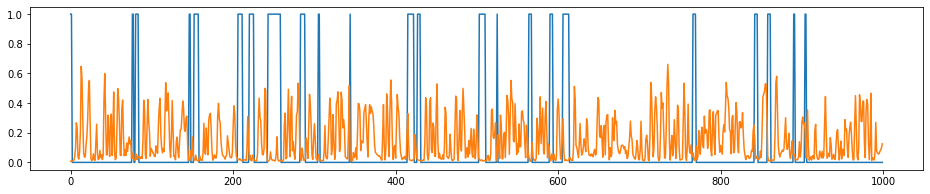

In [36]:
bAL = np.zeros(len(events))
bAL[idxs_AL_ev] = 1
bAL = bAL[idxs_filt]

fig, ax = plt.subplots(1, 1, figsize=(16, 3))

idx_l, idx_r = 0, 1000
ax.plot(bAL[idx_l:idx_r])
ax.plot(speed_ev[idxs_filt][idx_l:idx_r])
ax.plot(wx_all[4][idxs_filt][idx_l:idx_r])

(6135.0, 6195.0)

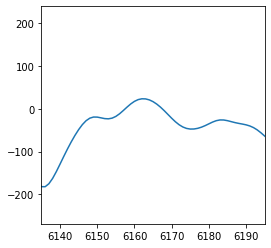

In [51]:
corr = signal.correlate(wx_all[4], bAL)

#lags = signal.correlation_lags(len(metric2), len(metric1))
#idx_l, idx_r = int(len(lags)/2) - t_lag*s_rate, int(len(lags)/2) + t_lag*s_rate
#y_min = corr[idx_l:idx_r].min()
#y_max = corr[idx_l:idx_r].max()

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

x_lim = int(len(corr)/2)
ax.plot(corr)
ax.set_xlim(x_lim - 30, x_lim + 30)

In [ ]:
source = '/home/sobolev/nevermind/Andrey/data/'
animal = '009266'
selected = get_sessions_list(os.path.join(source, animal), animal)
selected